# Homework 2

## FINM 36700 - 2024

### UChicago Financial Mathematics

#### Questions Prepared by:
* Mark Hendricks
* hendricks@uchicago.edu

#### Solutions Provided by:
* Austin Galm
* agalm@uchicago.edu

## HBS Case

### *ProShares Hedge Replication ETF*

***

# 1. The ProShares ETF Product

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

## 1. Alternative ETFs

Describe the two types of investments referenced by this term.

<span style="color:red;">

Alternative ETFs are categorized into "Alternative Asset Class" ETFs and "Alternative Strategy" ETFs:

* **Alternative Asset Class:** These ETFs invest indirectly in or try to mimic the returns of asset classes such as real estate, commodities, precious metals, currencies, volatility, and private equity.

* **Alternative Strategies:** These ETFs use unconventional approaches to provide unique return profiles. Example strategies are leveraged or inverse, long/short, market neutral, absolute return, convertible/merger arbitrage, managed futures, and global macro.

<span>

## 2. Hedge Funds.

a. Using just the information in the case, what are two measures by which hedge funds are an attractive investment?

b. What are the main benefits of investing in hedge funds via an ETF instead of directly?

<span style="color:red;">

a. The two measures by which hedge funds are an attractive investment are absolute returns market correlation.

b. The main benefits of investing in hedge funds via an ETF are:

* Accessibility for retail investors
* Availability of funds (i.e: liquidity)
* Transparency due to regulatory disclosure requirements of ETFs
* Lower fee structure
* Manager Diversification
* Tax Reporting

<span>

## 3. The Benchmarks

a. Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.

b. How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

c. In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)

d. What are the main concerns you have for how the MLFM attempts to replicate the HFRI?

<span style="color: red;">

a. Differences in construction and purpose
* **HFRI:** This is an index of surveyed hedge funds (2000 holdings), designed to track the performance of the hedge fund market as a whole. The returns are based on a survey, and it is not an ETF product.
* **MLFM:** An index created by Merrill Lynch to replicate the performance of HFRI. It is a LFD of HFRI returns into 6 assets. This is also not an ETF, and it serves as the benchmark to QAI.
* **MLFM-ES:** This is is similar to MLFM, but is the benchmark for HDG. The biggest difference between this and MLFM is that it substitutes the 6-month Eurodollar deposit yield asset with commensurate maturity US Treasury Bills.
* **HDG:** A tradeable ETF asset designed to track the MLFM-ES index by actually trading the tracked assets in the market. HDG does not strictly adhere to MLFM-ES replication and will occasionally deviate from position if they can get additional returns or reduce transaction costs.

b. According to the case, MLFM has a 90% correlation with HFRI through 2013.

c. The largest loading in MLFM was short-term treasury bills.

d. My main concerns are high correlation among investable assets and tracking error with HFRI.
* **High correlation** between the input factors will lead to a linear model that has multicollinearity problems.
* Replication is inherently limited in what it can capture. Most notably, ***MLFM's replication cannot directly replicate the $\alpha$ in hedge fund returns***. This means that while the replication may be highly correlated with hedge fund returns and offer similar diversification benefits in a portfolio, it will not offer the same absolute return benefits.

<span>

## 4. The HDG Product

a. What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

b. HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?

c. The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?

<span style="color:red;">

a. HDG tracks the MLFM-ES benchmark and yes, the tracking error is small.

b. HDG is still considered valuable because it offers diversification benefits in a portfolio. This means that allocating to HDG in a portfolio can deliver similar absolute returns at a markedly lower level of risk.

c. The gross returns of the underlying assets have a Sharpe ratio of 0.5. Net of the 1% fee, the net SR for the ETF would then be 9/20 = 0.45. Net of fees, the hedge fund has 6% excess returns, which leads to a Sharpe ratios of 6/20 = 0.3.

While this is a simple back-of-the-napkin calculation, it highlights an important point--though the ETF may miss some of the $\alpha$ provided by hedge funds, it has a much lower hurdle rate due to reduced fees.

<span>

***

# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. 

It has monthly data on financial indexes and ETFs from `Aug 2011` through `Sep 2024`.

In [1]:
# current_dir = os.getcwd()
# if current_dir[-8:] == "homework":
#     parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
#     os.chdir(parent_dir)
#     sys.path.insert(0, parent_dir)
# import cmds.portfolio_management_helper as pmh
# import cmds.TA_utils as utils

# file_path = os.path.join(current_dir, 'data/proshares_analysis_data.xlsx')
# hf_series = pd.read_excel(file_path, sheet_name='hedge_fund_series')
# mer_factors = pd.read_excel(file_path, sheet_name='merrill_factors')

from functools import partial
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sys

sys.path.append('../cmds/')

from TA_utils import *

plt.style.use("ggplot")
pd.options.display.float_format = "{:.4f}".format
p = plt.rcParams

%load_ext autoreload
%autoreload 2


read_excel = partial(pd.read_excel, index_col=0, parse_dates=[0])

hf_series = read_excel('../data/proshares_analysis_data.xlsx', sheet_name='hedge_fund_series')
mer_factors = read_excel('../data/proshares_analysis_data.xlsx', sheet_name='merrill_factors')

## 1. 

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

In [2]:
# Calculate performance metrics
calc_return_metrics(hf_series, as_df=True, adj=12)

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio,Annualized Sortino Ratio
HFRIFWI Index,0.0483,0.0595,0.8120,0.9829
MLEIFCTR Index,0.0363,0.0561,0.6464,0.8590
MLEIFCTX Index,0.0346,0.0560,0.6182,0.8259
HDG US Equity,0.0248,0.0584,0.4248,0.5687
QAI US Equity,0.0257,0.0500,0.5130,0.7284


**Note for potential edification:** *The annualized return is significant higher for HFRI without taking on considerably more risk. Even more interestingly, the Sortino ratio, which only penalizes returns for "downside deviations," is markedly higher than the other indices. This suggests that there are also fewer or less extreme negative drawdowns in the HFRI index.*

## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

In [3]:
calc_risk_metrics(hf_series, as_df=True, var=0.05)

,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Min,Max,Max Drawdown,Bottom,Peak,Recovery,Duration (days)
HFRIFWI Index,-0.9633,5.7631,-0.0243,-0.0375,-0.0908,0.0586,-0.1155,2020-03-31,2024-09-30,2020-08-31,153
MLEIFCTR Index,-0.2654,1.6316,-0.0282,-0.0359,-0.0532,0.0589,-0.1243,2022-09-30,2024-09-30,2024-02-29,517
MLEIFCTX Index,-0.2513,1.5959,-0.0281,-0.0358,-0.0524,0.0588,-0.1244,2022-09-30,2024-09-30,2024-02-29,517
HDG US Equity,-0.2542,1.7593,-0.0309,-0.0376,-0.0592,0.0583,-0.1407,2022-09-30,2024-09-30,2024-07-31,670
QAI US Equity,-0.4348,1.6059,-0.0179,-0.0327,-0.0563,0.0398,-0.1377,2022-09-30,2024-09-30,2024-02-29,517


## 3. 

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

In [4]:
spy = mer_factors[["SPY US Equity"]]

calc_iterative_regression(hf_series, spy, one_to_many=True, adj=12)

,Alpha,Beta,Downside Beta,R-Squared,Treynor Ratio,Information Ratio,Tracking Error
HFRIFWI Index,-0.0011,0.3461,0.2811,0.7115,0.1395,-0.0358,0.0027
MLEIFCTR Index,-0.0128,0.3434,0.2810,0.7861,0.1057,-0.4915,0.0022
MLEIFCTX Index,-0.0143,0.3422,0.2790,0.7849,0.1011,-0.5495,0.0022
HDG US Equity,-0.0255,0.3521,0.2700,0.7632,0.0705,-0.8963,0.0024
QAI US Equity,-0.0170,0.2984,0.2127,0.7478,0.0860,-0.6756,0.0021


## 4. 

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
* which performs better between HDG and QAI.
* whether HDG and the ML series capture the most notable properties of HFRI.

<span style="color:red;">

* The difference between SPY and hedge-fund series?

The statistics from the regressions in question 3 tell us that the market, represented by SPY, explains a considerable portion of the returns for each hedge-fund series. We can see that when each index is regressed against SPY, it exhibits an $R^2$ of greater than 70%. This is also exhibited by the low tracking errors.

We can also see from the statistics that hedge funds have been underperforming the market, as they produce negative alphas.

* Which performs better between HDG and QAI?

On a returns basis, HDG and QAI perform very similarly with similar excess returns (provided in question 1). However, HDG exhibits notably more risk, which leads to meaningfully lower Sharpe ratio and Sortino ratio.

Question 2 gives more detail about the elevated riskiness of HDG. Specifically, we notice that while HDG is less negatively skewed (i.e: exhibits a shorter left, or negative return, tail), it is also more leptokurtic, which means that its tails are fatter. This suggests that less-than-average returns happen more frequently in HDG.

Additionally, the max drawdown for MDG is greater than for QAI, and it took substantially longer for HDG to recover fully from it's max drawdown. Notably, the max drawdown dates were the same for HDG and QAI, but it took HDG over 150 days longer to recover from that drawdown.

* Do HDG and the ML series capture the most notable properties of HFRI

In my opinion, no. Importantly, the ML series and HDG are constrained in the way they can invest and their universe of investable assets. Consequently, they can only provide $\beta$ returns from the HFRI index. However, one of the most notable properties of the HFRI index is its $\alpha$ returns. That is, the returns is provides above market returns due to an information edge provided by hedge fund managers. This is something that cannot be directly replicated in the constrained environment that the ML series and HDG operate in.

<span>

## 5. 

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

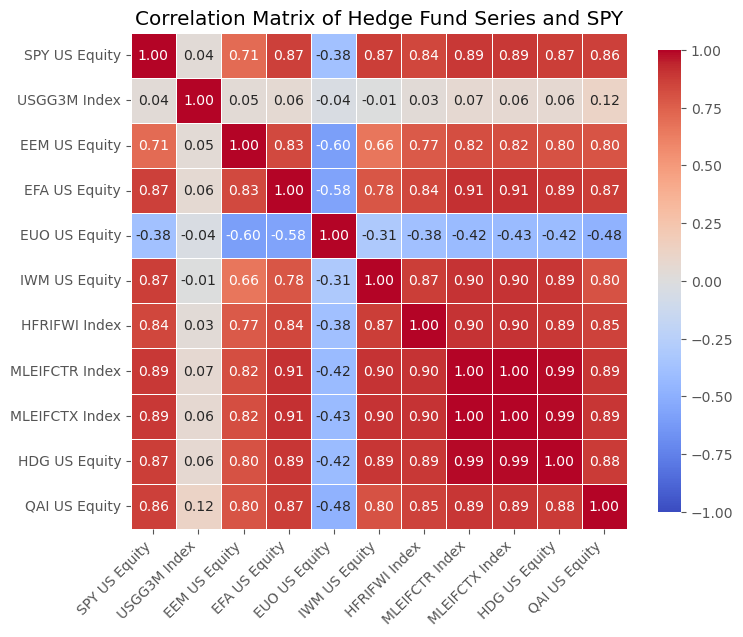

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = plot_correlation_matrix(pd.concat([mer_factors, hf_series], axis=1).corr(), ax=ax)
ax.set_title("Correlation Matrix of Hedge Fund Series and SPY");

In [6]:
print_max_min_correlation(pd.concat([mer_factors, hf_series], axis=1).corr())

Max Corr (by absolute value): MLEIFCTR Index and MLEIFCTX Index with a correlation of 1.00
Min Corr (by absolute value): USGG3M Index and IWM US Equity with a correlation of 0.01
Min Corr (raw): EEM US Equity and EUO US Equity with a correlation of -0.60


## 6.

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$$\begin{align}
r^{hfri}_{t} &= \alpha^{merr} + x_{t}^{merr}\beta^{merr} + \epsilon_{t}^{merr}\\[5pt]
\hat{r}^{hfri}_{t} &= \hat{alpha}^{merr} + x_{t}^{merr}\hat{\beta}^{merr}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

* Report the intercept and betas.
* Are the betas realistic position sizes, or do they require huge long-short positions?
* Report the R-squared.
* Report the volatility of $\epsilon^{merr}$, the tracking error.

In [7]:
with_int = calc_multivariate_regression(hf_series['HFRIFWI Index'], mer_factors).T
no_int = calc_multivariate_regression(hf_series['HFRIFWI Index'], mer_factors, intercept=False).T
regrs = pd.concat([with_int, no_int], axis=1)
regrs.columns = ["HFRI w/Intercept", "HFRI w/o Intercept"]
regrs

/Users/austingalm/Documents/GitHub/finm-portfolio-2024/homework/../cmds/TA_utils.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  summary[f"{col} Beta"] = betas[i]
/Users/austingalm/Documents/GitHub/finm-portfolio-2024/homework/../cmds/TA_utils.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  summary[f"{col} Beta"] = betas[i]


,HFRI w/Intercept,HFRI w/o Intercept
Alpha,0.0148,0.0000
R-Squared,0.8397,0.8452
SPY US Equity Beta,0.0365,0.0507
USGG3M Index Beta,0.1463,0.4993
EEM US Equity Beta,0.0816,0.0809
EFA US Equity Beta,0.0846,0.0791
EUO US Equity Beta,0.0288,0.0314
IWM US Equity Beta,0.1451,0.1427
Information Ratio,0.6225,0.0000
Tracking Error,0.0238,0.0239


<span style="color:red;">

The betas do imply realistic positions sizes and, in fact, all the implied positions are long. To assess the reasonableness, we can look at the absolute leverage implied by the positions. This is derived simply by taking the absolute value of each weight and then taking the sum of all the weights.

Below we can see that each of the positions weights sum to less than 1, suggesting that these regressions do not require any leverage to construct a replication portfolio.

<span>

In [8]:
print(f'Absolute leverage implied by the betas with intercept: {with_int.iloc[2:-2].abs().sum().iloc[0]}\nAbsolute leverage implied by the betas w/o intercept:  {no_int.iloc[2:-2].abs().sum().iloc[0]}')

Absolute leverage implied by the betas with intercept: 0.5229849245709615
Absolute leverage implied by the betas w/o intercept:  0.8840383365963871


## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation. 
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{merr}_{t}$ and $\tilde{\beta}^{merr}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{merr}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{hfri}_{t} \equiv \tilde{\alpha}^{merr} + (x_{t}^{merr})'\tilde{\beta}^{merr}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

/var/folders/n2/c52dj35d2j9_pl_l3r5fh9hc0000gn/T/ipykernel_9063/3427119553.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  summary[coeff].append(regr.params[jdx])
/var/folders/n2/c52dj35d2j9_pl_l3r5fh9hc0000gn/T/ipykernel_9063/3427119553.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred = regr.params[0] + (regr.params[1:] @ oos_X)
/var/folders/n2/c52dj35d2j9_pl_l3r5fh9hc0000gn/T/ipykernel_9063/3427119553.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

OOS-R-Squared: 80.43%


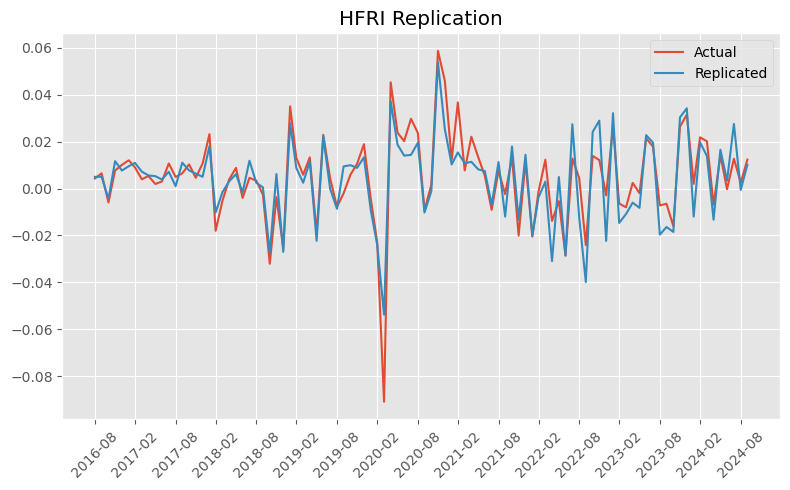

In [9]:
# TODO: Move this cell to a function and generalize it so we can calculate the fitted values with an intercept or without one.

hfri = hf_series[["HFRIFWI Index"]].copy()

summary = defaultdict(list)

for idx in range(60, len(hfri), 1):
    # Get the data for ML factors and HFRI
    X = mer_factors.iloc[idx - 60 : idx].copy()
    y = hfri.iloc[idx - 60 : idx, 0].copy()

    oos_y = hfri.iloc[idx, 0]
    oos_X = mer_factors.iloc[idx, :].copy()

    # Calculate the regression coefficients
    regr = sm.OLS(y, sm.add_constant(X), missing="drop").fit()

    for jdx, coeff in enumerate(regr.params.index):
        summary[coeff].append(regr.params[jdx])

    # Get predicted y by multiplying the coefficients by the X values and
    # adding the intercept
    y_pred = regr.params[0] + (regr.params[1:] @ oos_X)

    summary["Replicated"].append(y_pred)
    summary["Actual"].append(oos_y)


summary = pd.DataFrame(summary, index=hfri.index[60:])

# Calculate OOS R-Squared
oos_rsquared = (
    1 - (summary["Actual"] - summary["Replicated"]).var() / summary["Actual"].var()
)
print(f"OOS-R-Squared: {oos_rsquared:.2%}")

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(summary.index, summary["Actual"], label="Actual")
ax.plot(summary.index, summary["Replicated"], label="Replicated")
ax.grid(True)
ax.legend()

# Make ticklabels every 6 months and label them as %yyy-%mm
ax.set_xticks(summary.index[::6])
ax.set_xticklabels(
    [f"{i.year}-{i.month:02d}" for i in summary.index[::6]],
    rotation=45,
    horizontalalignment="center",
)

ax.set_title("HFRI Replication")
fig.tight_layout()

<span style="color:red;">

We have an OOS $R^2$ of over 80%, which is quite good for a simple linear regression.

<span>

## 8.

We estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{hfri}_{t} &= \alpha^{merr} + x_{t}^{merr}\beta^{merr} + \epsilon_{t}^{merr}\\[5pt]
\hat{r}^{hfri}_{t} &= \hat{\alpha}^{merr} + x_{t}^{merr}\hat{\beta}^{merr}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{merr}$?

* the mean of the fitted value, $\check{r}^{hfri}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{hfri}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?

In [10]:
regr_int = sm.OLS(hfri, sm.add_constant(mer_factors), missing="drop").fit()
regr_no_int = sm.OLS(hfri, mer_factors, missing="drop").fit()

# Calculate the fitted mean
fitted_mean = (regr_int.params[0] + regr_int.params[1:] @ mer_factors.mean()) * 12
fitted_mean_no_int = (regr_no_int.params @ mer_factors.mean()) * 12

# Get hfri mean
hfri_mean = hfri.mean()  * 12

print(f'HFRI Mean: {hfri_mean[0]:.2%}')
print(f'Fitted Mean: {fitted_mean:.2%}')
print(f'Fitted Mean (no intercept): {fitted_mean_no_int:.2%}')

display(regrs)

HFRI Mean: 4.83%
Fitted Mean: 4.83%
Fitted Mean (no intercept): 3.95%


/var/folders/n2/c52dj35d2j9_pl_l3r5fh9hc0000gn/T/ipykernel_9063/1278642961.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fitted_mean = (regr_int.params[0] + regr_int.params[1:] @ mer_factors.mean()) * 12
/var/folders/n2/c52dj35d2j9_pl_l3r5fh9hc0000gn/T/ipykernel_9063/1278642961.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'HFRI Mean: {hfri_mean[0]:.2%}')


,HFRI w/Intercept,HFRI w/o Intercept
Alpha,0.0148,0.0000
R-Squared,0.8397,0.8452
SPY US Equity Beta,0.0365,0.0507
USGG3M Index Beta,0.1463,0.4993
EEM US Equity Beta,0.0816,0.0809
EFA US Equity Beta,0.0846,0.0791
EUO US Equity Beta,0.0288,0.0314
IWM US Equity Beta,0.1451,0.1427
Information Ratio,0.6225,0.0000
Tracking Error,0.0238,0.0239


/var/folders/n2/c52dj35d2j9_pl_l3r5fh9hc0000gn/T/ipykernel_9063/683026141.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  summary[coeff].append(regr.params[jdx])


OOS-R-Squared: 79.49%


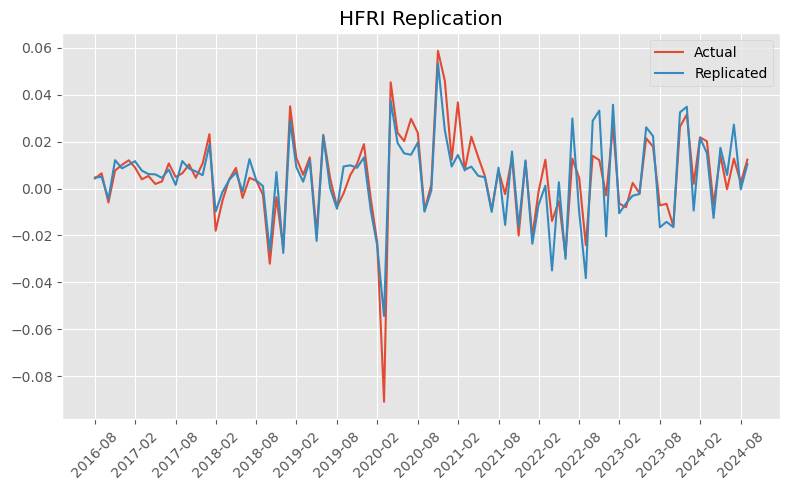

In [11]:
summary = defaultdict(list)

for idx in range(60, len(hfri), 1):
    # Get the data for ML factors and HFRI
    X = mer_factors.iloc[idx - 60 : idx].copy()
    y = hfri.iloc[idx - 60 : idx, 0].copy()

    oos_y = hfri.iloc[idx, 0]
    oos_X = mer_factors.iloc[idx, :].copy()

    # Calculate the regression coefficients
    regr = sm.OLS(y, X, missing="drop").fit()

    for jdx, coeff in enumerate(regr.params.index):
        summary[coeff].append(regr.params[jdx])

    # Get predicted y by multiplying the coefficients by the X values and
    y_pred = regr.params @ oos_X

    summary["Replicated"].append(y_pred)
    summary["Actual"].append(oos_y)


summary = pd.DataFrame(summary, index=hfri.index[60:])

# Calculate OOS R-Squared
oos_rsquared = (
    1 - (summary["Actual"] - summary["Replicated"]).var() / summary["Actual"].var()
)
print(f"OOS-R-Squared: {oos_rsquared:.2%}")

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(summary.index, summary["Actual"], label="Actual")
ax.plot(summary.index, summary["Replicated"], label="Replicated")
ax.grid(True)
ax.legend()

# Make ticklabels every 6 months and label them as %yyy-%mm
ax.set_xticks(summary.index[::6])
ax.set_xticklabels(
    [f"{i.year}-{i.month:02d}" for i in summary.index[::6]],
    rotation=45,
    horizontalalignment="center",
)

ax.set_title("HFRI Replication")
fig.tight_layout()

<span style="color:red;">

* **The regression beta:** How does it compare to the estimated beta with an intercept, $\hat{\beta}^{merr}$?

The regression betas are very similar when comapring across the estimated beta with an intercept and without. The one exception is the beta corresponding to the USGG3M Index, which represents returns of short-term treasuries.

* **The mean of the fitted value:** $\check{r}^{hfri}_{t}$. How does it compare to the mean of the HFRI?

The fitted means differ by nearly a full percentage point. The fitted mean with an intercept is identical to the true mean of HRFI over the dataset, while the fitted mean without an intercept is meaningfully lower. 

* **The correlations of the fitted values:** $\check{r}^{hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{hfri}_{t}$

We can assess the correlation by looking at the $R^2$ in the table above. The $R^2$ term is virtually the same across both regressions, but slightly higher without an intercept. This seems to suggest we could potentially explain more of the variance without an intercept.

I think Merrill and ProShares fit their regressors without a replicator. I support this conclusion with an intuitive understanding of $\alpha$. In investments, $\alpha$ is known as the uncorrelated returns of an investment vehicle that come from having an information edge, and this definition is supported by the formula for the information ratio. Therefore, using this intuitive understanding and the formulas of the linear regression model, we can conclude that $\alpha$ is not something one can yield from assets available in the market. Rather, it is a return that would have to be given. Consequently, since ProShares and Merrill are constructing their portfolios just by taking weightings of assets available in the market, they must be running their regressions without an intercept.

<span>

***

# 3.  Extensions
<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. 

Merrill constrains the weights of each asset in its replication regression of HFRI. Try constraining your weights by re-doing 2.6.

* Use Non-Negative Least Squares (NNLS) instead of OLS.
* Go further by using a Generalized Linear Model to put separate interval constraints on each beta, rather than simply constraining them to be non-negative.

#### Hints
* Try using LinearRegression in scikit-learn with the parameter `positive=True`. 
* Try using GLM in statsmodels.

NNLS R-Squared: 83.97%


,Weight
Intercept,0.0012
SPY US Equity,0.0365
USGG3M Index,0.1463
EEM US Equity,0.0816
EFA US Equity,0.0846
EUO US Equity,0.0288
IWM US Equity,0.1451


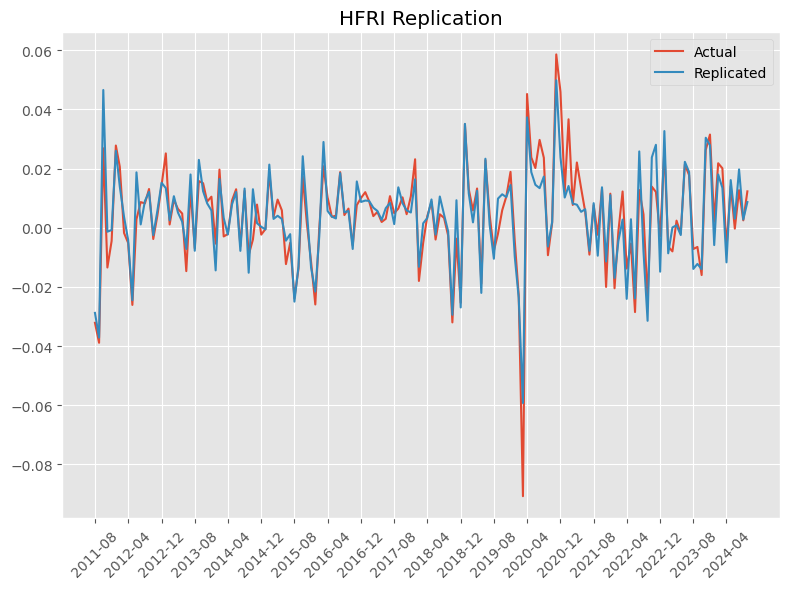

In [12]:
# Use non-negative least squares to get the weights
from sklearn.linear_model import LinearRegression

non_neg = LinearRegression(fit_intercept=True, positive=True).fit(mer_factors, hfri)

non_neg_r2 = non_neg.score(mer_factors, hfri)
print(f"NNLS R-Squared: {non_neg_r2:.2%}")

# Display the weights
weights = pd.DataFrame(
    [non_neg.intercept_[0], *non_neg.coef_[0]],
    index=["Intercept", *mer_factors.columns],
    columns=["Weight"],
)
display(weights)

# Plot the replication
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(hfri.index, hfri, label="Actual")
ax.plot(hfri.index, non_neg.predict(mer_factors), label="Replicated")
ax.legend()
ax.grid(True)
ax.set_title("HFRI Replication")
ax.set_xticks(hfri.index[::8])
ax.set_xticklabels(
    [f"{i.year}-{i.month:02d}" for i in hfri.index[::8]],
    rotation=45,
    horizontalalignment="center",
)
fig.tight_layout()

GLM R-Squared: 73.46%


,Weights
const,0.0012
SPY US Equity,0.0500
USGG3M Index,0.1000
EEM US Equity,0.0819
EFA US Equity,0.0778
EUO US Equity,0.0280
IWM US Equity,0.1403


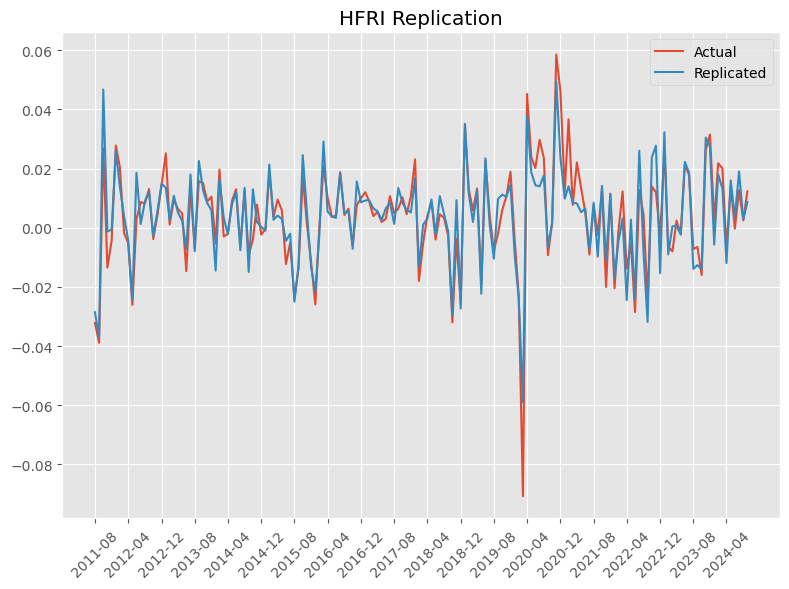

In [13]:
# Use GLM to get the weights, suppose we cap the USGG3M at 0.1 and SPY at 0.05
glm_weights = sm.GLM(
    hfri, sm.add_constant(mer_factors), family=sm.families.Gaussian()
).fit_constrained(["USGG3M Index = 0.1", "SPY US Equity = 0.05"])

# Calculate R-2

# This is from: https://stackoverflow.com/questions/26541899/why-doesnt-statsmodels-glm-have-r2-in-results
sst_val = sum(map(lambda x: np.power(x, 2), y - np.mean(y)))
sse_val = sum(map(lambda x: np.power(x, 2), glm_weights.resid_response))
r2 = 1.0 - sse_val / sst_val

print(f"GLM R-Squared: {r2:.2%}")

# Display the weights
display(pd.DataFrame(glm_weights.params, columns=["Weights"]))

# Plot the replication
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(hfri.index, hfri, label="Actual")
ax.plot(
    hfri.index,
    glm_weights.predict(sm.add_constant(mer_factors)),
    label="Replicated"
)
ax.legend()
ax.grid(True)
ax.set_xticks(hfri.index[::8])
ax.set_xticklabels(
    [f"{i.year}-{i.month:02d}" for i in hfri.index[::8]],
    rotation=45,
    horizontalalignment="center",
)
ax.set_title("HFRI Replication")
fig.tight_layout()

## 2. 

Let's decompose a few other targets to see if they behave as their name suggests.

* Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

* Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds--in terms of our styles, what best describes venture capital?

* TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

In [14]:
other_data = read_excel('../data/proshares_analysis_data.xlsx', sheet_name='other_data')

calc_multivariate_regression(other_data["HEFA US Equity"], mer_factors, intercept=True).T

/Users/austingalm/Documents/GitHub/finm-portfolio-2024/homework/../cmds/TA_utils.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  summary[f"{col} Beta"] = betas[i]


,HEFA US Equity
Alpha,0.0110
R-Squared,0.9646
SPY US Equity Beta,0.0491
USGG3M Index Beta,-0.0616
EEM US Equity Beta,-0.0577
EFA US Equity Beta,0.9324
EUO US Equity Beta,0.3397
IWM US Equity Beta,-0.0044
Information Ratio,0.4703
Tracking Error,0.0233


<span style="color:red;">

Yes, HEFA does appear to be a currency hedged version of EFA. This is evidenced by the $\beta$ of EFA being near 1 and the $R^2$ also being near 1 for this regression.The EFA $\beta$ being near 1 suggests that HEFA moves nearly 1:1 with the EFA ETF, and this relationship is highly explanatory, as evidenced by the high $R^2$. Additionally, the other ETF with some explanatory power is the EUO ETF, which is an inverse levered currency fund.

<span>

In [15]:
calc_multivariate_regression(other_data["TRVCI Index"], mer_factors, intercept=True).T

/Users/austingalm/Documents/GitHub/finm-portfolio-2024/homework/../cmds/TA_utils.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  summary[f"{col} Beta"] = betas[i]


,TRVCI Index
Alpha,-0.0188
R-Squared,0.7093
SPY US Equity Beta,1.9741
USGG3M Index Beta,0.1741
EEM US Equity Beta,-0.0517
EFA US Equity Beta,-0.1450
EUO US Equity Beta,-0.0551
IWM US Equity Beta,-0.2425
Information Ratio,-0.1313
Tracking Error,0.1434


<span style="color:red;">

It looks like the market, as represented by the SPY ETF, has the most explanatory power for TRVCI. Interestingly, it appears that venture capital is expected to provide nearly double the returns of the market. This is evidenced by the SPY ETF's $\beta$ is this regression, which is near 2. This suggests that for every 1% return in the SPY ETF, we should expect to see ~2% return in TRVCI, ceteris paribus. However, this regression also has a lower $R^2$, and thus we must consider that this decomposition has less explanatory power than the preceding example.

<span>

In [17]:
display(calc_multivariate_regression(other_data["TAIL US Equity"], spy, intercept=True).T)

/Users/austingalm/Documents/GitHub/finm-portfolio-2024/homework/../cmds/TA_utils.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  summary[f"{col} Beta"] = betas[i]


,TAIL US Equity
Alpha,-0.0012
R-Squared,0.5086
SPY US Equity Beta,-0.4904
Information Ratio,-0.0154
Tracking Error,0.0796


<span style="color:red;">

Fund disclosure page for TAIL: https://cambriafunds.com/tail

This fund disclosure page states that, "...Tail Risk ETF seeks to mitigate downside market risk by purchasing a portfolio of "out of the money" put options on the SP 500 Index..." This description better aligns with the above regression results. Since the fund only buys OTM put options on the SP 500, we would expect its returns to have an inverse correlation with the SP 500. Further, since it is buying OTM put options, it will only profit when the SP 500 dips by a sufficient level. Therefore, the $\beta$ coefficient shouldn't quite be equal to -1. 

<span>

## 3. 

The ProShares case introduces Levered ETFs. ProShares made much of its name originally through levered, or "geared" ETFs.

Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

<span style="color:red;">

Because they have to continually re-lever in order to track the index at 3x. This means that they have a decay over time and the expected return of holding these ETF to infinity is -100%. As an example:

Day 1: SPY is at 100, and closes at 110 (10% up). The 3x ETF is at 100, and closes at 130 (30% up). Day 2: SPY is at 110, and closes at 100 (-9.1% down). The 3x ETF is at 130, and closes at 94.51 (-27.3% down).

So, even though SPY is back to where it started, the 3x ETF is down 5.49%. This is because it has to re-lever every day, and so it is buying high and selling low. For example, during the financial crisis when there were many large movements down, we would expect these ETFs to lose a lot of value due to continually having to re-lever. This is also why they have high management fees (UPRO has 0.91% management fee, compared to 0.09% for SPY, or 0.03% for VOO).

Pro Shares also wins the dubious award of most value lost by an ETF creator: https://twitter.com/quantian1/status/1600168896459251712?s=20

<span>

## 4.

Analyze SPXU and UPRO relative to SPY.
- SPXU is ProShares -3x SPX ETF.
- UPRO is ProShres +3x SPX ETF.

Questions:
* Analyze them with the statistics from 2.1-2.3. 

* Do these two ETFs seem to live up to their names?

* Plot the cumulative returns of both these ETFs along with SPY.

* What do you conclude about levered ETFs?

<span style="color:red;">

Note that in when talking about leverage, using **monthly** returns is somewhat misleading, since these ETFs only target **daily** 3x/-3x returns, but provide no guarantees on monthly returns. However, we can still use monthly returns to get a sense of how well they track their target.

<span>

In [18]:
# Note that if we maintained perfect 3x leverage, we would expect UPRO vs. SPY to have a beta of 3 on SPY.
# In fact, Pro-Shares even claims this on their website:
# 3x Short: https://www.proshares.com/globalassets/proshares/fact-sheet/prosharesfactsheetspxu.pdf
# 3x Long: https://www.proshares.com/globalassets/proshares/fact-sheet/prosharesfactsheetupro.pdf
upro_regr = calc_univariate_regression(other_data["UPRO US Equity"], spy, intercept=True).T
upro_regr

,UPRO US Equity
Alpha,-0.0767
Beta,3.0893
Downside Beta,3.0643
R-Squared,0.9930
Treynor Ratio,0.1180
Information Ratio,-2.0352
Tracking Error,0.0031


In [19]:
# Same thing but for SPXU -- -3x leverage.
spxu_regr = calc_univariate_regression(other_data["SPXU US Equity"], spy, intercept=True).T
spxu_regr

,SPXU US Equity
Alpha,-0.0654
Beta,-2.6424
Downside Beta,-2.0361
R-Squared,0.9131
Treynor Ratio,0.1676
Information Ratio,-0.5536
Tracking Error,0.0098


<span style="color:red;">

It does a worse job. Perhaps this is unsurprising given the SPY has trended up, meaning that being 3x short it means that you are constantly losing money and needing to re-lever (as described above). What is particularly interesting is the Downside Beta, which is -2 compared to -2.6 for normal beta. So this indicates that the upside perhaps is asymmetric. Importantly, though, this is an unfair comparison: we are looking at monthly returns on an ETF which explicitly says it targets daily -3x returns, so we should expect some divergence when looking at monthly returns.

<span>

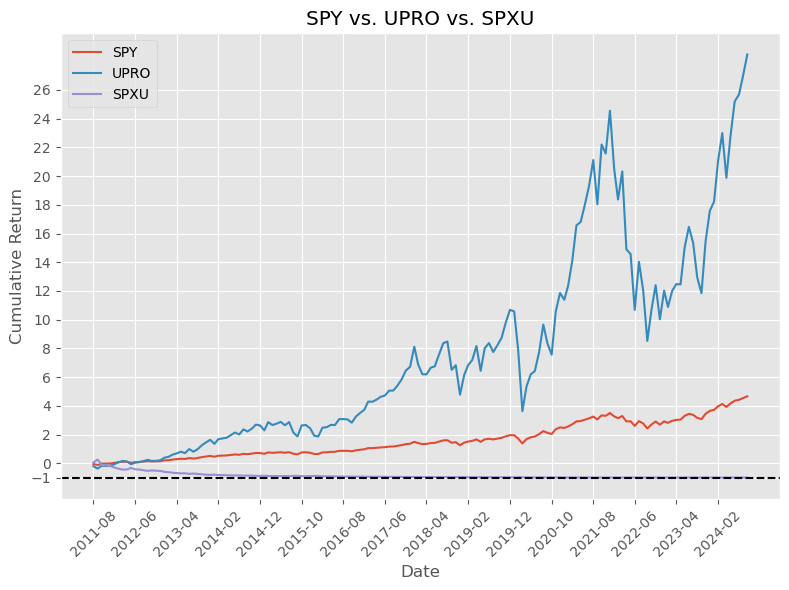

In [20]:
# Plot cumulative returns
spy_df = {
    "SPY": (1 + rets_spy["SPY US Equity"]).cumprod() - 1,
    "UPRO": (1 + other_data["UPRO US Equity"]).cumprod() - 1,
    "SPXU": (1 + other_data["SPXU US Equity"]).cumprod() - 1,
}

spy_df = pd.DataFrame(spy_df, index=rets_spy["SPY US Equity"].index)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(spy_df.index, spy_df["SPY"], label="SPY")
ax.plot(spy_df.index, spy_df["UPRO"], label="UPRO")
ax.plot(spy_df.index, spy_df["SPXU"], label="SPXU")

ax.legend()
ax.grid(True)

ax.axhline(-1, color="black", linestyle="--")

ax.set_xticks(spy_df.index[::10])
ax.set_xticklabels(
    [f"{i.year}-{i.month:02d}" for i in spy_df.index[::10]],
    rotation=45,
    horizontalalignment="center",
)
ax.set_title("SPY vs. UPRO vs. SPXU")
ax.set_yticks([-1] + [i for i in range(0, 27, 2)])
ax.set_ylabel("Cumulative Return")
ax.set_xlabel("Date")
fig.tight_layout()

<span style="color:red;">

Levered ETFs are pretty cool when you invest in an asset that generally trends up over time! However, if you invest in inverse leverage against such an asset, then you are making a bad bet. However, inverse levered ETFs can provide diversifying return profiles for a portfolio with a small allocation. So the enduring nature of these seemingly terrible funds is somewhat unsurprising.

<span>

***